In [1]:
def calc_error(meas, ref):
    abs_err_real = abs(meas['Z_real'] - ref['Z_real'])
    abs_err_imag = abs(meas['Z_imag'] - ref['Z_imag'])
    pct_err_real = abs_err_real / abs(ref['Z_real']) * 100
    pct_err_imag = abs_err_imag / abs(ref['Z_imag']) * 100
    return abs_err_real, abs_err_imag, pct_err_real, pct_err_imag

Importing 4 kHz and 131 kHz measurements taken with 32620 and with 32655 systems

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 32655 calibrated
m131k = {"Z_real":74.59665762790958, "Z_imag":-252.41579124419258}
m4k = {"Z_real": 159.83331030640733, "Z_imag": 16.02505843222876}

# 32655 uncalibrated
m131k_uncalibrated = {"Z_real":23.860798319327735, "Z_imag":-1.1147058823529412}
m4k_uncalibrated = {"Z_real":38.80675847457627, "Z_imag":-25.244978813559324}

# 32620 calibrated
ref_131k = {'Z_real': 24.789184813769964, 'Z_imag': -1.5182747972901605}
ref_4k   = {'Z_real': 30.611429579805463,   'Z_imag': -40.886786661896544}

err_131k = calc_error(m131k, ref_131k)
err_4k   = calc_error(m4k, ref_4k)

print(f"131 kHz -> \n|ΔZ_real|={err_131k[0]:.4f} ({err_131k[2]:.2f}%), \n|ΔZ_imag|={err_131k[1]:.4f} ({err_131k[3]:.2f}%)")
print(f"4 kHz   -> \n|ΔZ_real|={err_4k[0]:.4f} ({err_4k[2]:.2f}%), \n|ΔZ_imag|={err_4k[1]:.4f} ({err_4k[3]:.2f}%)")
print("\n\n")
print("Using uncalibrated 32655 samples:\n")
print(f"131 kHz -> \n|ΔZ_real|={calc_error(m131k_uncalibrated, ref_131k)[0]:.4f} ({calc_error(m131k_uncalibrated, ref_131k)[2]:.2f}%), \n|ΔZ_imag|={calc_error(m131k_uncalibrated, ref_131k)[1]:.4f} ({calc_error(m131k_uncalibrated, ref_131k)[3]:.2f}%)")
print(f"4 kHz   -> \n|ΔZ_real|={calc_error(m4k_uncalibrated, ref_4k)[0]:.4f} ({calc_error(m4k_uncalibrated, ref_4k)[2]:.2f}%), \n|ΔZ_imag|={calc_error(m4k_uncalibrated, ref_4k)[1]:.4f} ({calc_error(m4k_uncalibrated, ref_4k)[3]:.2f}%)")

131 kHz -> 
|ΔZ_real|=49.8075 (200.92%), 
|ΔZ_imag|=250.8975 (16525.17%)
4 kHz   -> 
|ΔZ_real|=129.2219 (422.14%), 
|ΔZ_imag|=56.9118 (139.19%)



Using uncalibrated 32655 samples:

131 kHz -> 
|ΔZ_real|=0.9284 (3.75%), 
|ΔZ_imag|=0.4036 (26.58%)
4 kHz   -> 
|ΔZ_real|=8.1953 (26.77%), 
|ΔZ_imag|=15.6418 (38.26%)


### Sacando el error entre los coeficientes de calibración

In [40]:
expected = {
    "i_coef_4k": 0.9,
    "q_coef_4k": 0.9016,
    "i_phase_coef_4k": -22.458,
    "q_phase_coef_4k": -22.57,
    "i_offset_4k": -488.7,
    "q_offset_4k": -258.5,
    "i_coef_131k": 1.0055,
    "q_coef_131k": 1.0097,
    "i_phase_coef_131k": 0.432,
    "q_phase_coef_131k": 0.648,
    "i_offset_4k": -488.7,
    "q_offset_4k": -258.5,
    "i_offset_131k": -507.7,
    "q_offset_131k": -137.3,
}

measured = {
    "i_coef_4k": 56.616113,
    "q_coef_4k": 56.763960,
    "i_phase_coef_4k": -51.061611,
    "q_phase_coef_4k": -51.321484,
    "i_offset_4k": -874.2312925170068,
    "q_offset_4k": 42.68027210884354,
    "i_coef_131k": 8.681611,
    "q_coef_131k": 11.103435,
    "i_phase_coef_131k": -73.550823,
    "q_phase_coef_131k": 1.597671,
    "i_offset_131k": 92.89115646258503,
    "q_offset_131k": 1288.1904761904761,
}

for k in expected:
    err = abs((measured[k] - expected[k]) / expected[k]) * 100
    print(f"{k}: {err:.2f}% error")

i_coef_4k: 6190.68% error
q_coef_4k: 6195.91% error
i_phase_coef_4k: 127.36% error
q_phase_coef_4k: 127.39% error
i_offset_4k: 78.89% error
q_offset_4k: 116.51% error
i_coef_131k: 763.41% error
q_coef_131k: 999.68% error
i_phase_coef_131k: 17125.65% error
q_phase_coef_131k: 146.55% error
i_offset_131k: 118.30% error
q_offset_131k: 1038.23% error


### Comparando las medidas sin calibrar entre el OOTB y el In Hosue

In [41]:
ootb = pd.read_csv("logs_32620-system/logs/MAX30009_20251019_014516.bioz.csv", usecols=["BIOZI", "BIOZQ"], sep=",")
inhouse = pd.read_csv("logs_32655-system/load_measurement/sampleset_2.txt", usecols=["I", "Q"], sep=" ")

# Overlapping uncalibrated 32655 samples with calibrated 32620 samples

Importing samples:

In [27]:
# 32655 datasets
df_4k_32655 = pd.read_csv("logs_32655-system/df_exports/4k/df_4k2025-11-07 05-18.csv", sep=",")
df_131k_32655 = pd.read_csv("logs_32655-system/df_exports/131k/df_131k2025-11-07 05-18.csv", sep=",")

# 32620 datasets
df_4k_32620 = pd.read_csv("logs_32620-system/logs_calibrated/4khz/MAX30009_Samples_4khz_2025-11-07 07-50.csv", sep=",")
df_131k_32620 = pd.read_csv("logs_32620-system/logs_calibrated/131khz/MAX30009_Samples_131khz_2025-11-07 07-50.csv", sep=",")

df_4k_32620

,Unnamed: 0,I,Q
0,0,30.593423,-40.899939
1,1,30.609840,-40.898778
2,2,30.616639,-40.901589
3,3,30.616639,-40.901589
4,4,30.619457,-40.894807
...,...,...,...
164,164,30.599060,-40.886376
165,165,30.605859,-40.889186
166,166,30.629075,-40.890836
167,167,30.638693,-40.886865


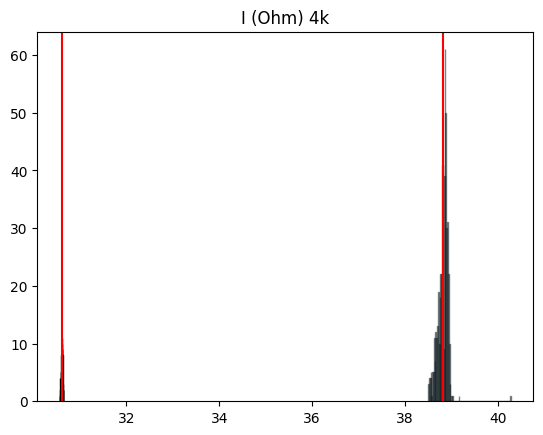

In [26]:
plt.hist(df_4k_32655["I"], bins=100, alpha=0.5, color="skyblue", edgecolor="black")
plt.hist(df_4k_32620["I"], bins=100, color="blue", edgecolor="black")
plt.title("I (Ohm) 4k")
plt.axvline(df_4k_32655["I"].mean(), color='red')
plt.axvline(df_4k_32620["I"].mean(), color='red')
plt.show()

In [ ]:
Q_4k = plt.hist(df_4k_32655["Q"], bins=100, alpha=0.5, color="yellow", edgecolor="black")
Q_4k = plt.hist(df_4k_32620["Q"], bins=100, color="yellow", edgecolor="black")
plt.title("Q (Ohm) 4k")
plt.axvline(df_4k_32655["Q"].mean(), color='red')
plt.axvline(df_4k_32620["Q"].mean(), color='red')
plt.show()

I_131k = plt.hist(df_131k_32655["I"], bins=100, alpha=0.5, color="skyblue", edgecolor="black")
I_131k = plt.hist(df_131k_32620["I"], bins=100, color="skyblue", edgecolor="black")
plt.title("I (Ohm) 131k")
plt.axvline(df_131k_32655["I"].mean(), color="red")
plt.axvline(df_131k_32620["I"].mean(), color="red")
plt.show(I_131k)

Q_131k = plt.hist(df_131k_32655["Q"], bins=100,alpha=0.5,  color="yellow", edgecolor="black")
Q_131k = plt.hist(df_131k_32620["Q"], bins=10,  color="yellow", edgecolor="black")
plt.title("Q (Ohm) 131k")
plt.axvline(df_131k_32655["Q"].mean(), color="red")
plt.axvline(df_131k_32620["Q"].mean(), color="red")
plt.show(Q_131k)